In [1]:
import os
os.chdir("../../../")

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import surgeon
sc.set_figure_params(dpi=200)

Using TensorFlow backend.
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohammad/anaconda3/e

In [3]:
condition_key = "dataset"
cell_type_key_1 = "ann_level_1"
cell_type_key_2 = "ann_level_2"
cell_type_key_3 = "ann_level_3"
target_datasets = ["Madissoon", "Morse"]

In [4]:
adata = sc.read(f"./data/lung_data_moh.h5ad")
adata

AnnData object with n_obs × n_vars = 153031 × 45065 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'
    var: 'gene_ids_ARMS040_VieiraBraga', 'feature_types_ARMS040_VieiraBraga', 'genome_ARMS040_VieiraBraga', 'gene_ids_ARMS051_VieiraBraga', 'feature_types_ARMS051_VieiraBraga', 'genome_ARMS051_VieiraBraga', 'gene_ids_ARMS032_VieiraBraga', 'feature_types_ARMS032_VieiraBraga', 'genome_ARMS032_VieiraBraga', 'gene_ids_ARMS054_VieiraBraga', 'feature_types_ARMS054_VieiraBraga', 'genome_ARMS054_VieiraBraga', 'gene_ids_ARMS038_VieiraBraga', 'feature_types_ARMS038_VieiraBraga', 'genome

In [5]:
adata.obs[condition_key].value_counts()

Madissoon    56711
Reyfman      41778
Habermann    31644
Morse        22898
Name: dataset, dtype: int64

In [6]:
sc.pp.subsample(adata, fraction=0.5)

In [7]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [8]:
hvg = surgeon.utils.hvg_batch(adata, target_genes=2000, batch_key=condition_key)

Using 620 HVGs from full intersect set
Using 495 HVGs from n_batch-1 set
Using 768 HVGs from n_batch-2 set
Using 117 HVGs from n_batch-3 set
Using 2000 HVGs


In [9]:
adata = adata[:, hvg]
adata

View of AnnData object with n_obs × n_vars = 76515 × 2000 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'
    var: 'gene_ids_ARMS040_VieiraBraga', 'feature_types_ARMS040_VieiraBraga', 'genome_ARMS040_VieiraBraga', 'gene_ids_ARMS051_VieiraBraga', 'feature_types_ARMS051_VieiraBraga', 'genome_ARMS051_VieiraBraga', 'gene_ids_ARMS032_VieiraBraga', 'feature_types_ARMS032_VieiraBraga', 'genome_ARMS032_VieiraBraga', 'gene_ids_ARMS054_VieiraBraga', 'feature_types_ARMS054_VieiraBraga', 'genome_ARMS054_VieiraBraga', 'gene_ids_ARMS038_VieiraBraga', 'feature_types_ARMS038_VieiraBraga', '

In [10]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6

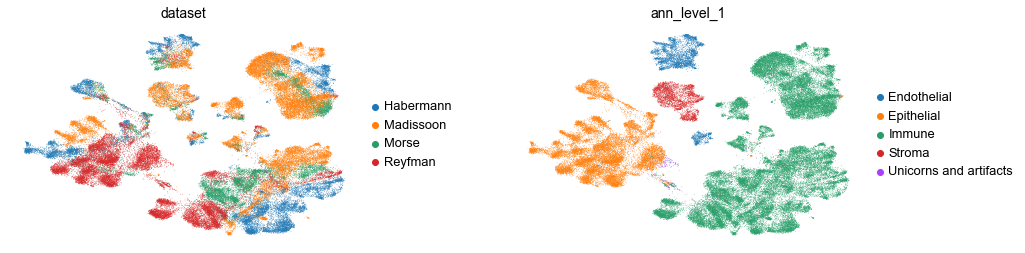

In [11]:
sc.pl.umap(adata, color=[condition_key, cell_type_key_1], wspace=0.3, frameon=False)

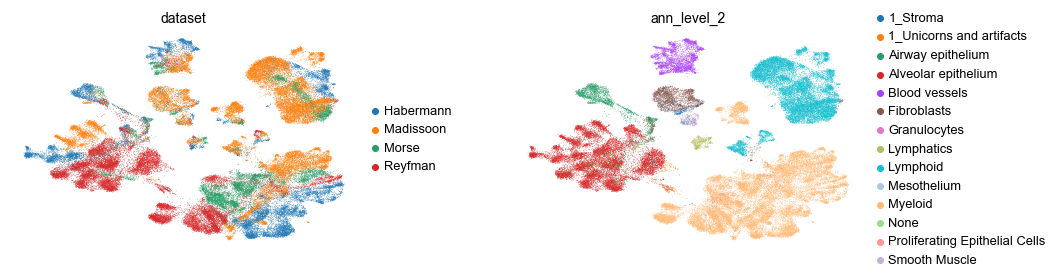

In [12]:
sc.pl.umap(adata, color=[condition_key, cell_type_key_2], wspace=0.3, frameon=False)

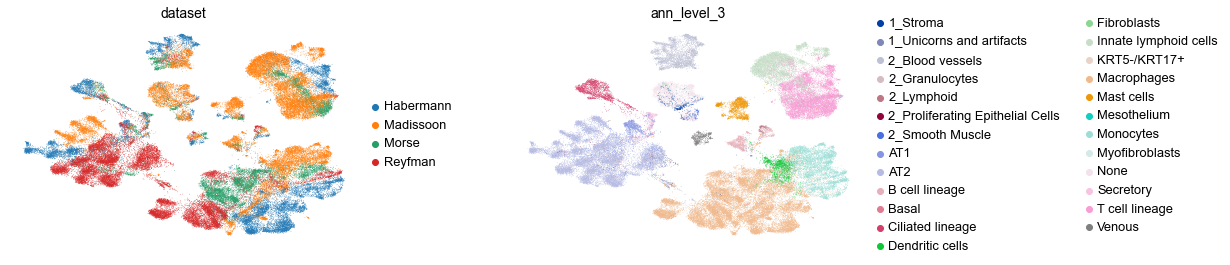

In [13]:
sc.pl.umap(adata, color=[condition_key, cell_type_key_3], wspace=0.3, frameon=False)

In [14]:
adata = adata[adata.obs[cell_type_key_3] != "None"]
adata_for_training = adata[~adata.obs[condition_key].isin(target_datasets)]
adata_out_of_sample = adata[adata.obs[condition_key].isin(target_datasets)]

In [15]:
adata.obs[condition_key].value_counts()

Madissoon    25742
Reyfman      19941
Habermann    15767
Morse        11428
Name: dataset, dtype: int64

In [16]:
n_conditions = len(adata_for_training.obs[condition_key].value_counts())

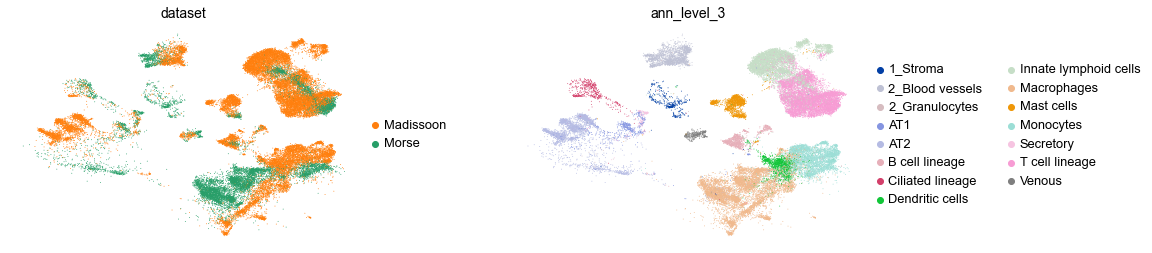

In [17]:
sc.pl.umap(adata_out_of_sample, color=[condition_key, cell_type_key_3], wspace=0.3, frameon=False)

### Pretraining

In [18]:
network = surgeon.archs.CVAE(x_dimension=adata_for_training.shape[1], 
                             z_dimension=10,
                             architecture=[128,128, 128, 20],
                             use_batchnorm=False,
                             n_conditions=n_conditions,
                             lr=0.01,
                             alpha=0.001,
                             beta=5,
                             eta=1,
                             clip_value=1000.0,
                             loss_fn='mse',
                             model_path="./models/CVAE/run/lung/before/",
                             dropout_rate=0.0005,
                             output_activation='relu')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 2000)         0                                            
__________________________________________________________________________________________________
encoder_labels (InputLayer)     (None, 2)            0                                            
__________________________________________________________________________________________________
first_layer (FirstLayer)        (None, 128)          256256      data[0][0]                       
                                                                 encoder_labels[0][0]             
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 128)          0           first_layer[0][0]                
__________

In [19]:
datasets = adata_for_training.obs[condition_key].unique().tolist()
dataset_encoder = surgeon.utils.create_dictionary(datasets, [])

In [20]:
datasets

['Reyfman', 'Habermann']

In [21]:
adata_for_training

View of AnnData object with n_obs × n_vars = 35708 × 2000 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'
    var: 'gene_ids_ARMS040_VieiraBraga', 'feature_types_ARMS040_VieiraBraga', 'genome_ARMS040_VieiraBraga', 'gene_ids_ARMS051_VieiraBraga', 'feature_types_ARMS051_VieiraBraga', 'genome_ARMS051_VieiraBraga', 'gene_ids_ARMS032_VieiraBraga', 'feature_types_ARMS032_VieiraBraga', 'genome_ARMS032_VieiraBraga', 'gene_ids_ARMS054_VieiraBraga', 'feature_types_ARMS054_VieiraBraga', 'genome_ARMS054_VieiraBraga', 'gene_ids_ARMS038_VieiraBraga', 'feature_types_ARMS038_VieiraBraga', '

In [22]:
train_adata, valid_adata = surgeon.utils.train_test_split(adata_for_training, 0.95)

In [23]:
network.train(train_adata,
              valid_adata,
              condition_key=condition_key,
              le=dataset_encoder,
              n_epochs=500,
              batch_size=1024,
              early_stop_limit=200,
              lr_reducer=300,
              n_per_epoch=0,
              save=True,
              retrain=True,
              verbose=1)

Train on 33922 samples, validate on 1786 samples
Epoch 1/500
33922/33922 [==============================] - 2s 66us/step - loss: 136.6250 - reconstruction_loss: 136.5008 - mmd_loss: 0.1234 - val_loss: 107.4271 - val_reconstruction_loss: 107.2871 - val_mmd_loss: 0.1391
Epoch 2/500
33922/33922 [==============================] - 1s 18us/step - loss: 90.6961 - reconstruction_loss: 90.4506 - mmd_loss: 0.2447 - val_loss: 80.2375 - val_reconstruction_loss: 79.9176 - val_mmd_loss: 0.3191
Epoch 3/500
33922/33922 [==============================] - 1s 19us/step - loss: 78.2770 - reconstruction_loss: 77.9351 - mmd_loss: 0.3411 - val_loss: 73.7889 - val_reconstruction_loss: 73.4214 - val_mmd_loss: 0.3667
Epoch 4/500
33922/33922 [==============================] - 1s 19us/step - loss: 71.7264 - reconstruction_loss: 71.3686 - mmd_loss: 0.3570 - val_loss: 68.1609 - val_reconstruction_loss: 67.8113 - val_mmd_loss: 0.3488
Epoch 5/500
33922/33922 [==============================] - 1s 18us/step - loss: 65.

In [24]:
encoder_datasets, _ = surgeon.utils.label_encoder(adata_for_training, label_encoder=network.condition_encoder,
                                                        condition_key=condition_key)

MMD

In [25]:
latent_adata = network.to_mmd_layer(adata_for_training, encoder_datasets, encoder_datasets)
latent_adata

AnnData object with n_obs × n_vars = 35708 × 20 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'

In [26]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/pyth

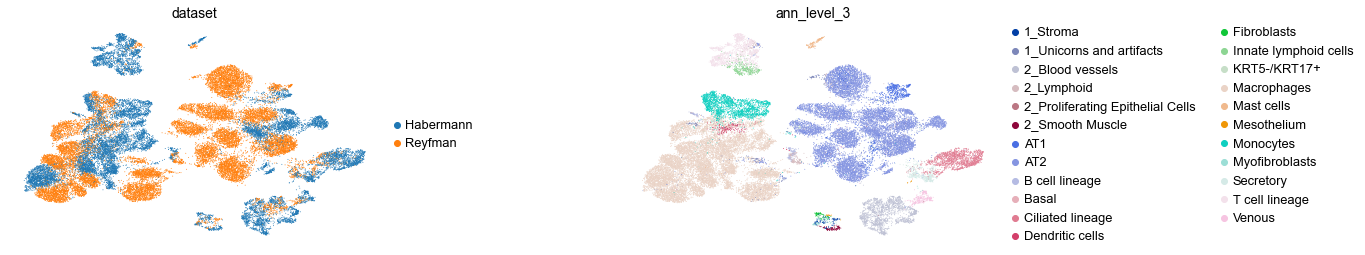

In [27]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key_3], 
           wspace=0.5, frameon=False, save=None)

latent 

In [28]:
latent_adata = network.to_latent(adata_for_training, encoder_datasets)
latent_adata

AnnData object with n_obs × n_vars = 35708 × 10 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'

In [29]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


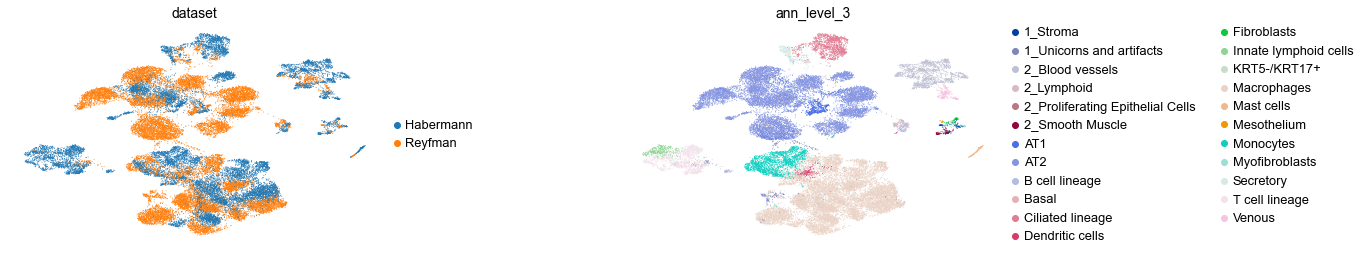

In [30]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key_3], 
           wspace=0.5, frameon=False, save=None)

## Training

In [31]:
new_network = surgeon.operate(network, 
                              new_conditions=target_datasets,
                              remove_dropout=True,
                              init='zeros', 
                              freeze=True,
                              freeze_expression_input=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 2000)         0                                            
__________________________________________________________________________________________________
encoder_labels (InputLayer)     (None, 4)            0                                            
__________________________________________________________________________________________________
first_layer (FirstLayer)        (None, 128)          256512      data[0][0]                       
                                                                 encoder_labels[0][0]             
__________________________________________________________________________________________________
leaky_re_lu_9 (LeakyReLU)       (None, 128)          0           first_layer[0][0]                
__________

In [32]:
new_network.model_path = f"./models/CVAE/run/lung/after/"

In [33]:
new_network.condition_encoder

{'Reyfman': 0, 'Habermann': 1, 'Madissoon': 2, 'Morse': 3}

In [34]:
adata_out_of_sample.obs[condition_key].value_counts()

Madissoon    25742
Morse        11428
Name: dataset, dtype: int64

In [35]:
train_adata, valid_adata = surgeon.utils.train_test_split(adata_out_of_sample, 0.95)

In [36]:
train_adata.shape, valid_adata.shape

((35311, 2000), (1859, 2000))

In [37]:
new_network.train(train_adata,
                  valid_adata,
                  condition_key=condition_key,
                  le=new_network.condition_encoder,
                  n_epochs=300,
                  batch_size=1024,
                  early_stop_limit=100,
                  lr_reducer=300,
                  n_per_epoch=0,
                  save=True,
                  retrain=True,
                  verbose=0)

In [38]:
new_network.condition_encoder

{'Reyfman': 0, 'Habermann': 1, 'Madissoon': 2, 'Morse': 3}

In [39]:
encoder_datasets, _ = surgeon.utils.label_encoder(adata_out_of_sample, label_encoder=new_network.condition_encoder,
                                                        condition_key=condition_key)
encoder_datasets.shape

(37170, 1)

MMD surgery 

In [40]:
latent_adata = new_network.to_mmd_layer(adata_out_of_sample, encoder_datasets, encoder_datasets)
latent_adata

AnnData object with n_obs × n_vars = 37170 × 20 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'

In [41]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


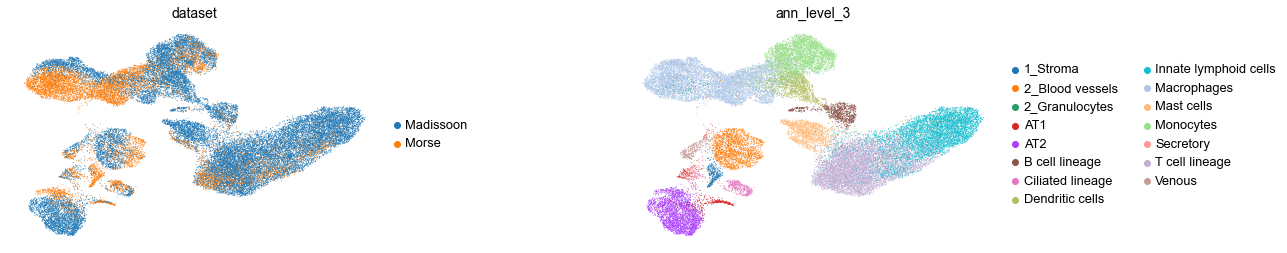

In [42]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key_3], 
           wspace=0.5, frameon=False, save=None)

latent surgery

In [43]:
latent_adata = new_network.to_latent(adata_out_of_sample, encoder_datasets)
latent_adata

AnnData object with n_obs × n_vars = 37170 × 10 
    obs: 'dataset', 'patient', 'sample', 'sample_alias', 'total_counts', 'ann_lowest_level', 'ann_new', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'n_counts', 'size_factors', 'age, in years', 'age, range', 'sex', 'ethnicity', 'mixed ethnicity', 'smoking status', 'smoking history', 'dataset_long', 'Habermann_celltype', 'Madissoon_Celltypes', 'VieiraBraga_ClusterNumbers', 'Morse_annotation', 'Reyfman_annotations', 'ann_level_5', 'ann_highest_res'

In [44]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


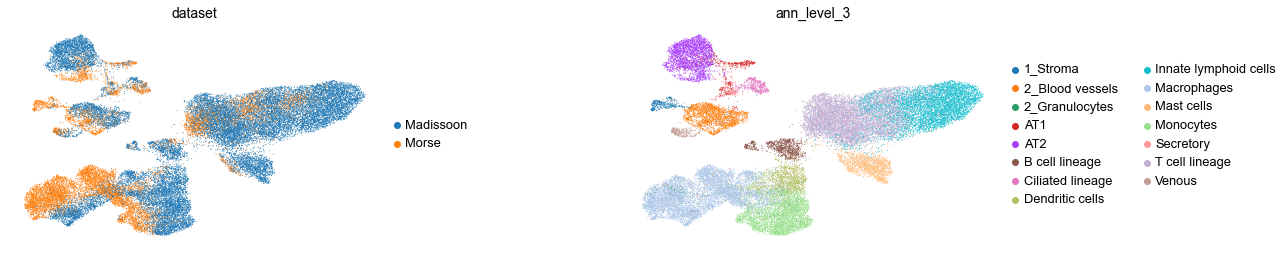

In [45]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key_3], 
           wspace=0.5, frameon=False, save=None)

In [46]:
encoder_datasets, _ = surgeon.utils.label_encoder(adata, label_encoder=new_network.condition_encoder,
                                                        condition_key=condition_key)
encoder_datasets.shape

(72878, 1)

MMD

In [47]:
latent_adata = new_network.to_mmd_layer(adata, encoder_datasets, encoder_datasets)

In [48]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


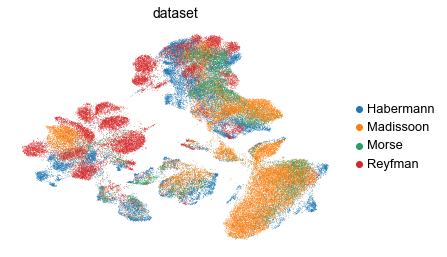

In [49]:
sc.pl.umap(latent_adata, color=[condition_key] ,wspace=0.7, frameon=False, save="_lung_study_after_wl.pdf")

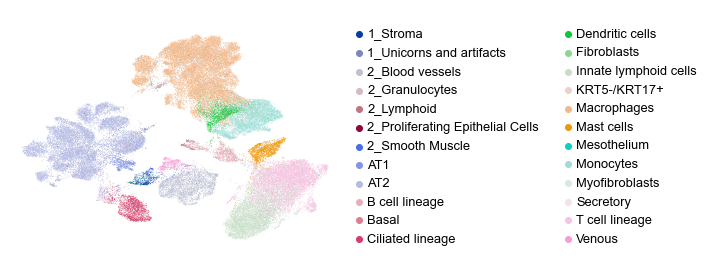

In [50]:
sc.pl.umap(latent_adata, color=[cell_type_key_3] ,
           wspace=0.7, frameon=False, save="_lung_celltype_after_leg.pdf", title=" ")

In [51]:
train_latent = latent_adata[~latent_adata.obs[condition_key].isin(target_datasets)]
train_latent.obs["dataset type"] = np.repeat("refrence", len(train_latent))
target_latent = latent_adata[latent_adata.obs[condition_key].isin(target_datasets)]
target_latent.obs["dataset type"] = np.repeat("query", len(target_latent))
latent_adata = train_latent.concatenate(target_latent)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


... storing 'Habermann_celltype' as categorical
... storing 'Madissoon_Celltypes' as categorical
... storing 'Morse_annotation' as categorical
... storing 'Reyfman_annotations' as categorical
... storing 'age, in years' as categorical
... storing 'age, range' as categorical
... storing 'ann_highest_res' as categorical
... storing 'ann_level_1' as categorical
... storing 'ann_level_2' as categorical
... storing 'ann_level_3' as categorical
... storing 'ann_level_4' as categorical
... storing 'ann_level_5' as categorical
... storing 'dataset' as categorical
... storing 'dataset type' as categorical
... storing 'dataset_long' as categorical
... storing 'ethnicity' as categorical
... storing 'mixed ethnicity' as categorical
... storing 'patient' as categorical
... storing 'sample' as categorical
... storing 'smoking history' as categorical
... storing 'smoking status' as categorical


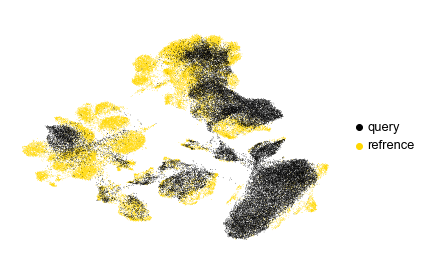

In [52]:
sc.pl.umap(latent_adata, color=["dataset type"] ,
           wspace=0.7, frameon=False,
           save="_lung_query_after_leg.pdf", title=" ",
          palette = ["black", "gold"])

# Classfication 

In [53]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [54]:
neigh = KNeighborsClassifier(n_neighbors=50, weights="distance")

In [55]:
train_latent.obs[cell_type_key_3].value_counts()

Macrophages                         13382
AT2                                 11909
Monocytes                            2081
2_Blood vessels                      1721
T cell lineage                       1422
Ciliated lineage                     1359
AT1                                   943
Secretory                             487
Innate lymphoid cells                 369
2_Lymphoid                            328
Venous                                315
1_Unicorns and artifacts              250
Dendritic cells                       215
B cell lineage                        199
Mast cells                            170
KRT5-/KRT17+                          105
2_Smooth Muscle                       103
1_Stroma                              103
Myofibroblasts                         91
Fibroblasts                            69
Basal                                  36
2_Proliferating Epithelial Cells       34
Mesothelium                            17
Name: ann_level_3, dtype: int64

In [56]:
neigh.fit(train_latent.X, train_latent.obs[cell_type_key_3].tolist())
lables = neigh.predict(target_latent.X)

In [57]:
print(classification_report(target_latent.obs[cell_type_key_3].tolist(), lables))

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                1_Stroma       0.96      0.43      0.60       364
1_Unicorns and artifacts       0.00      0.00      0.00         0
         2_Blood vessels       0.97      0.89      0.93      2025
          2_Granulocytes       0.00      0.00      0.00       160
              2_Lymphoid       0.00      0.00      0.00         0
         2_Smooth Muscle       0.00      0.00      0.00         0
                     AT1       0.99      0.33      0.50       552
                     AT2       0.81      0.99      0.89      2790
          B cell lineage       0.97      0.69      0.81      1054
        Ciliated lineage       0.90      0.89      0.90       492
         Dendritic cells       0.71      0.35      0.47      1396
             Fibroblasts       0.00      0.00      0.00         0
   Innate lymphoid cells       0.94      0.68      0.79      6266
             Macrophages       0.84      0.97      0.90      7800
         

## PCA space 

In [58]:
from sklearn.decomposition import PCA
neigh = KNeighborsClassifier(n_neighbors=50, weights="distance")
adata_out_of_sample = adata[adata.obs[condition_key].isin(target_datasets)]
adata_for_training = adata[~adata.obs[condition_key].isin(target_datasets)]
pca = PCA(n_components=10)
x_pca = pca.fit_transform(adata_for_training.X.A)

In [59]:
neigh.fit(x_pca, adata_for_training.obs[cell_type_key_3].tolist())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

In [60]:
lables = neigh.predict(pca.transform(adata_out_of_sample.X.A))

In [61]:
print(classification_report(adata_out_of_sample.obs[cell_type_key_3].tolist(), lables))

/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                1_Stroma       0.96      0.39      0.55       364
1_Unicorns and artifacts       0.00      0.00      0.00         0
         2_Blood vessels       0.99      0.83      0.90      2025
          2_Granulocytes       0.00      0.00      0.00       160
              2_Lymphoid       0.00      0.00      0.00         0
         2_Smooth Muscle       0.00      0.00      0.00         0
                     AT1       0.99      0.41      0.58       552
                     AT2       0.93      0.99      0.96      2790
          B cell lineage       0.40      0.86      0.54      1054
                   Basal       0.00      0.00      0.00         0
        Ciliated lineage       1.00      0.92      0.96       492
         Dendritic cells       0.84      0.23      0.36      1396
             Fibroblasts       0.00      0.00      0.00         0
   Innate lymphoid cells       0.97      0.11      0.20      6266
         